In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from tensorflow.keras.datasets import mnist

In [86]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

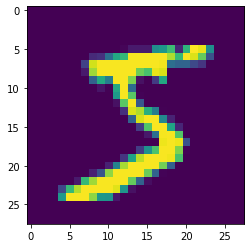

In [87]:
plt.imshow(X_train[0])

In [88]:
X_train[0].max()

255

In [89]:
# scaling the image
X_train = X_train/255
X_test = X_test/255

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [91]:
X_train[0].shape

(28, 28)

In [92]:
#pixel size is 28
28*28

784

In [93]:
784/2 # Deviding with 2, to guese the no of nurons we will give as input

392.0

In [94]:
encoder = Sequential()

encoder.add(Flatten(input_shape = [28,28]))# Flattening the size of the all images to 28 * 28 Pixels
encoder.add(Dense(400,activation = 'relu'))
encoder.add(Dense(200,activation = 'relu'))
encoder.add(Dense(100,activation = 'relu'))
encoder.add(Dense(50,activation = 'relu'))
encoder.add(Dense(25,activation = 'relu'))

In [95]:
25/784

0.03188775510204082

means 3.2 % of th original feature size

In [96]:
28*28 #this no of nurons we nee to give at the end

784

In [97]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid')) # we need to compare this with actual images, here we are getting binary crossentropy
decoder.add(Reshape([28,28])) #need to be same with the encoder pixels to compare

In [98]:
autoencoder = Sequential([encoder, decoder])

In [99]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 1.5), metrics = ['accuracy'])

In [100]:
autoencoder.fit(X_train,X_train,epochs = 5, validation_data = [X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 453us/sample - loss: 0.2528 - acc: 0.7911 - val_loss: 0.2128 - val_acc: 0.7933
Epoch 2/5
60000/60000 [==============================] - 26s 435us/sample - loss: 0.1832 - acc: 0.7979 - val_loss: 0.1616 - val_acc: 0.8011
Epoch 3/5
60000/60000 [==============================] - 27s 445us/sample - loss: 0.1569 - acc: 0.8026 - val_loss: 0.1484 - val_acc: 0.8048
Epoch 4/5
60000/60000 [==============================] - 27s 447us/sample - loss: 0.1465 - acc: 0.8044 - val_loss: 0.1439 - val_acc: 0.8064
Epoch 5/5
60000/60000 [==============================] - 27s 445us/sample - loss: 0.1411 - acc: 0.8053 - val_loss: 0.1370 - val_acc: 0.8046


In [101]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


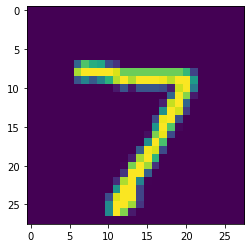

After Autoencoding the image


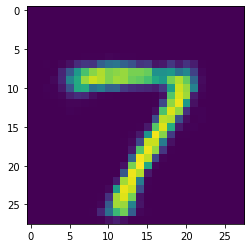

In [102]:
n=0
print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('After Autoencoding the image')
plt.imshow(passed_images[n])

Original Image


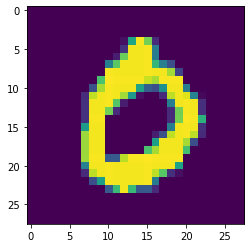

After Autoencoding the image


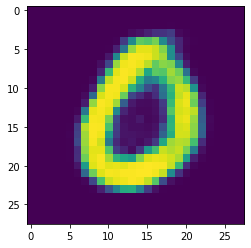

In [103]:
n=3
print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('After Autoencoding the image')
plt.imshow(passed_images[n])

Original Image


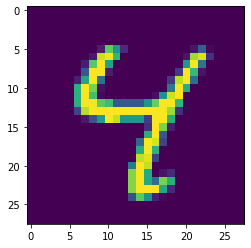

After Autoencoding the image


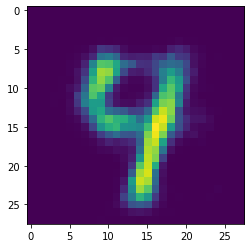

In [59]:
n=6
print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('After Autoencoding the image')
plt.imshow(passed_images[n])